## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0825 13:45:08.139049  6760 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 13:45:08.170965  6760 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 13:45:08.178943  6760 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0825 13:45:31.101630  6760 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 13:45:31.113599  6760 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0825 13:45:49.082600  6760 deprecation.py:323] From C:\Users\sam0522\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 13:45:49.238184  6760 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 157us/step - loss: 2.2691 - acc: 0.1509 - val_loss: 2.2104 - val_acc: 0.2095
Epoch 2/100
50000/50000 [==============================] - 8s 154us/step - loss: 2.1730 - acc: 0.2366 - val_loss: 2.1367 - val_acc: 0.2602
Epoch 3/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.1098 - acc: 0.2636 - val_loss: 2.0820 - val_acc: 0.2733
Epoch 4/100
50000/50000 [==============================] - 7s 142us/step - loss: 2.0610 - acc: 0.2788 - val_loss: 2.0391 - val_acc: 0.2876
Epoch 5/100
50000/50000 [==============================] - 8s 154us/step - loss: 2.0231 - acc: 0.2896 - val_loss: 2.0056 - val_acc: 0.2974
Epoch 6/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.9929 - acc: 0.2990 - val_loss: 1.9794 - val_acc: 0.3056
Epoch 7/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.9681 - acc: 0.3077 - val_loss: 1.

50000/50000 [==============================] - 7s 148us/step - loss: 1.6442 - acc: 0.4243 - val_loss: 1.6501 - val_acc: 0.4255
Epoch 60/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.6415 - acc: 0.4251 - val_loss: 1.6451 - val_acc: 0.4229
Epoch 61/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6384 - acc: 0.4251 - val_loss: 1.6436 - val_acc: 0.4257
Epoch 62/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.6358 - acc: 0.4267 - val_loss: 1.6419 - val_acc: 0.4272
Epoch 63/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.6328 - acc: 0.4274 - val_loss: 1.6380 - val_acc: 0.4260
Epoch 64/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.6302 - acc: 0.4293 - val_loss: 1.6367 - val_acc: 0.4270
Epoch 65/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6276 - acc: 0.4300 - val_loss: 1.6329 - val_acc: 0.4286
Epoch 66/100
50000/50000 [=======

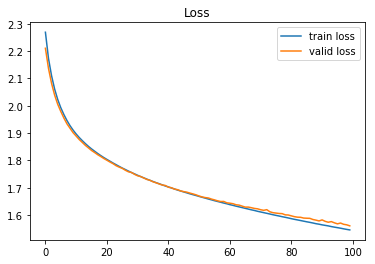

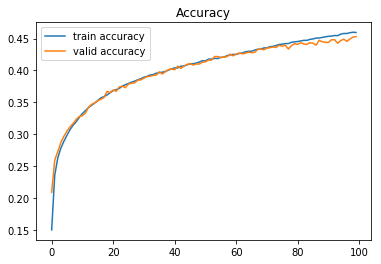

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()